Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). Do NOT add any cells to the notebook!

Make sure you fill in any place that says `YOUR CODE HERE` or _YOUR ANSWER HERE_ , as well as your name and group below:

In [1]:
NAME = "Davide Pichler"
STUDENTID = "12217756"
GROUPID = "Group 8";

# Assignment 5 (Group)
In Assignment 2, as a group, you trained yourselves in accessing and characterising two data sources. You also sketched out a data-science project based on these data sources. In this assignment, based on this project idea, you should select, implement, and describe 3 appropriate visualisations.

The following materials provide the necessary background:
* the slide deck on visualisations (Unit 5) and the corresponding notebook;
* Chapter 3 of "Data Science from Scratch"
* the mandatory read on "Task-Based Effectiveness of Basic Visualizations" available from MyLearn: _B. Saket, A. Endert and Ç. Demiralp (2019), "Task-Based Effectiveness of Basic Visualizations," in IEEE Transactions on Visualization and Computer Graphics, vol. 25, no. 7, pp. 2505-2512, DOI: 10.1109/TVCG.2018.2829750_

Requirements:
* Required reading: Study the paper by Saket et al. (2019) and explicitly refer to the task types, pros & cons of different visualisations as identified by these authors when answering the questions on this assignment.
* The visualisation should be appropriate the chosen tasks on the data sets.
* You should use at least two different types of visualisations. Even if two tasks in two steps below were identical (e.g., two aggregation tasks), you would be expected to choose a different visualisation for each. 
* As contrast to Assignment 2, you will be expected to use `pandas` to represent and to prepare the data sets for visualisation.
* As for the data sets collected during Assignment 2, to avoid confusion:
  * Use the genuine ones, not the manipulated ones (having anomalies introduced). 
  * If you have worked with excerpts (samples) from the original and genuine datasets, you can continue to use these. You are also free to use the complete datasets, but this is not expected.
  * Please stick to your project description in Assignment 2 when choosing tasks and corresponding visualisations.

-----
## Step 1 (6 points)

Select, implement and describe one visualisation for data source 1 (in isolation from data source 2).

Nan
Id                  True
Date               False
1_month            False
3_month            False
6_month            False
1_year             False
2_year             False
3_year             False
5_year             False
7_year             False
10_year            False
20_year            False
30_year            False
30_year_display    False
2_month             True
4_month             True
dtype: bool
First value in 2_month: 2018-10-16T00:00:00
First value in 4_month: 2022-10-19T00:00:00
-------------------


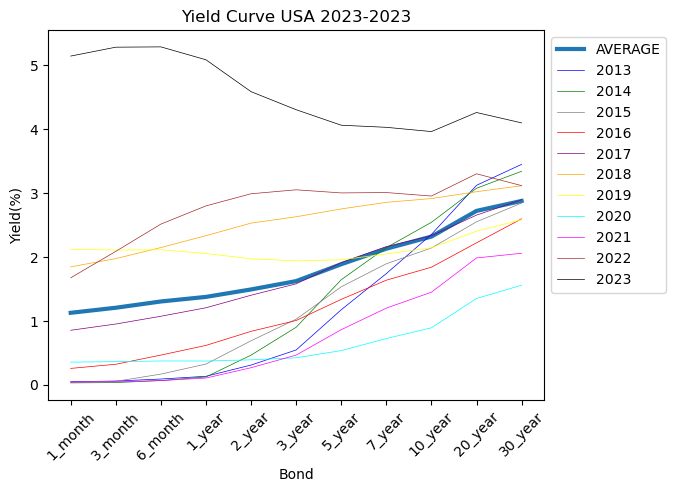

In [4]:
import xmltodict
import pandas as pd
import matplotlib.pyplot as plt

#Readin the XML into a panads df
with open("./data/data_notebook-1.1_YieldCurveUSA.xml") as xml_file:
    data_dict = xmltodict.parse(xml_file.read())


entries = data_dict["feed"]["entry"]
rows = []
for entry in entries:
    row = {key: value["#text"] for key, value in entry["content"]["m:properties"].items()}
    rows.append(row)

#Crearing the df
df_1 = pd.DataFrame(rows)


#Change the columns names
new_column_names = ["Id", "Date", "1_month", "3_month", "6_month",
                    "1_year", "2_year", "3_year", "5_year", "7_year",
                    "10_year", "20_year", "30_year", "30_year_display",
                    "2_month", "4_month"]

df_1.columns = new_column_names

#Check for Nan 

print("Nan")
print(df_1.isna().any())

#Check first value in the 2 problematic rows
for i, val in enumerate(df_1["2_month"]):
    if not pd.isna(val):
        index = i
        break
print("First value in 2_month: " + str(df_1["Date"][index]))

for i, val in enumerate(df_1["4_month"]):
    if not pd.isna(val):
        index = i
        break
print("First value in 4_month: " + str(df_1["Date"][index]))

print("-------------------")

#2 equal columns problem

#Check if the column have the same values
#print("Equal columns:" , (df_1["30_year_display"]==df_1["30_year"]).all())

#Drop columns(check answer for justification)
df_1.drop(columns=["Id", "2_month","4_month", "30_year_display"], axis= 1, inplace=True)

#Data types 

#print(df_1.dtypes)

# Convert "Date" column to datetime
df_1["Date"] = pd.to_datetime(df_1["Date"])

# Convert all other columns to integer
df_1[df_1.columns[1:]] = df_1[df_1.columns[1:]].astype(float)

#print(df_1.dtypes)


#Prepare to plot 

#Average yiel curve
mean_values = df_1.iloc[:, 1:].mean(numeric_only=True)

#Summarize by Year

#Create a copy to group by year
df_1_1 = df_1.copy()

#New "Year" column 
df_1_1["Year"] = df_1_1["Date"].dt.year
#Group by year
summary = df_1_1.groupby("Year").mean(numeric_only=True)

#Save the indexes as 
row_names = summary.index.tolist()

#Plot 

plt.plot(mean_values, label= "AVERAGE",linewidth= 3)
#Define the colours to not have the same 
colors = ["blue", "green", "grey", "red", "purple", "orange", "yellow", "cyan", "magenta", "brown", "black"]

#Add one curve for each year
for i in range(0,len(summary)):
    plt.plot(summary.iloc[i][0:], label= row_names[i], linewidth=0.5, color=colors[i])

#Add details to the plot
plt.legend()


plt.title("Yield Curve USA 2023-2023")
plt.xlabel("Bond")
plt.ylabel("Yield(%)")

plt.xticks(rotation=45) 

#Legend outside the plot 
plt.legend(loc= "upper left", bbox_to_anchor=(1, 1))



Document your decision and describe the resulting visualisation. In your answer, cover the following aspects by referring explicitly to Saket et al. (2019):

* What is the task according to Saket et al. (2019) on the data source supported by the chosen visualisation?
* Why is the chosen visualisation effective for the given task?
* What does the visualisation show exactly?
* What does the visualisation contribute to answering your project's questions?

#### Answer:
As we already mentioned, the presented visualization represents the yearly “Yield Curve” of the USA from 2013 to 2023 created by taking the yearly average of each daily value within the year. 
The “Yield Curve” is a specific graph used in macroeconomics and finance, which is defined as a line plot that represents the different interest rates of bonds with the same credit quality but different maturity dates. 
In the context of USA treasury bonds, we can see the different yields of treasury bonds starting from short-term( 1-3 months) to long-term (30 years).

On the x-axis, we can find the different types of bonds based on maturity, and on the y-axis, we can the corresponding yield expressed in percentage terms. All values, by definition, are connected by a line, forming the line plot and the so-called “Yield Curve”.


In this case, the choice of visualization type was strongly related to the definition of the “Yield Curve”.  However, in the context of Saket et al. (2019) would be to retrieve specific values to then effectively compare the different years. Even though it is explicitly said that line charts are not advised for such task, it is important to consider the specificity of the case. In fact, as underlying in the discussion part of the paper, there is one single solution and the optimal choice is very much case-dependent. 
Moreover, we believe that the choice of a line chart for this specific task is not only rooted in the definition of the “Yield Curve” but also makes sense in accomplishing the task of comparing the different years. In fact, the object of the analysis are not the single data points forming the curve but the shape curve itself. 
While I would agree that the probable more optimal solution was to couple the presented chart with a table where year-to-year comparison of specific values would be easily accomplished. Presenting only a table or other graphical solution would compromise the essence of the Yield Curve, namely its shape.
In fact, the shape of the yield curve is used to understand and individuate specific economic situations and sentiments. 
A so-called “normal Yield Curve” corresponds to an upward-sloping curve where the yields of long-term bonds are superior to the short-term ones.
An “inverted Yield Curve” corresponds to a downward-sloping curve where the yield of short-term bonds is superior to the long-term ones, this is interpreted as a sign of economic recession.
A “flat yield curve” underlines a period of economic uncertainty.

Having understood this different definition, it is clear that the object of the visualization is the comparison between single values but between the different shapes of the yield curves.

This visualization helps to answer the first of our research questions: “What was the development of the U.S. yield curve in the last 10 years? How did the NDX perform in the last 10 years?”. It accomplishes that by presenting an overview of the average yield curve shape in the analyzed period, as well as the yearly curves, where all three previously described shapes, and corresponding economical situations, are individuable. 

#### Remark on the code:
Before arriving at the final plot, it has been necessary to prepare the data accordingly. In this brief comment, we will try to explain what we did.

There were three problems with the data, presence of Nans, data type, and 2 columns for the 30-year bond.
The presence of Nan was limited to the 2 last columns: the 2 and the 4-month treasury bond. After researching the USA treasury website, we found out that these two bonds were introduced during the examination period. (https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_yield_curve&field_tdr_date_value_month=202404)

We then checked when the first value appeared and we saw that they both corresponded to the date of implementation. However, for the scope of our analysis, we decided to drop the two columns, this allowed for a perfect year-by-year comparison, considering also that the yield curve overall shape would not be much affected by the introduction of two additional data points.
After having solved the issue with the NaN, we changed the data type and, after making sure all the values of the two “30_years” bond columns were the same we dropped one of them.
We then proceed to plot the average yield curve of the period (2013-2023) as well as the yield curve of each year, taking the average of each daily value. 


------
## Step 2 (6 points)

Select, implement and describe one visualisation for data source 2 (in isolation from data source 1).

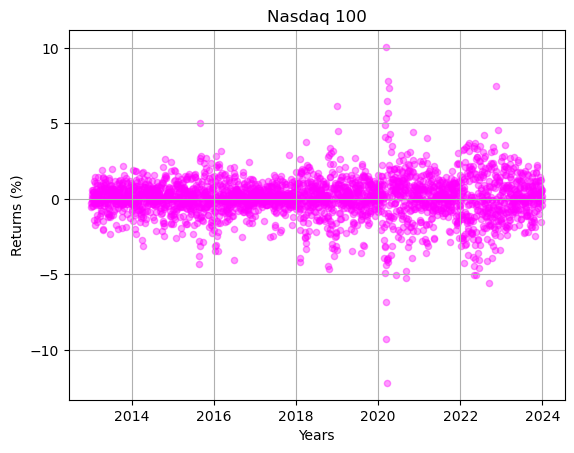

In [5]:
# YOUR CODE HERE
import pandas as pd
import matplotlib.pyplot as plt
import os

urbanAuditFile = 'data/data_notebook-1.2_^NDX.csv'
df_2 = pd.read_csv(urbanAuditFile, index_col=0, na_values=':')
df_2['Date'] = pd.to_datetime(df_2.index)

#Calculate daily percentage change in Adjusted Close price
df_2['Adj Close_Return'] = df_2['Adj Close'].pct_change() * 100  # Renditen in Prozent

df_2 = df_2.dropna() #for any missing values present 
#alternatively can use shift to assign to the previous year ( for the first value)

#Plot
pl = df_2.plot.scatter(x='Date', y='Adj Close_Return', color='magenta', alpha=0.4) #colour and saturation

# dt.year assigns a year format
df_2['Year'] = df_2['Date'].dt.year

plt.title('Nasdaq 100') 
plt.xlabel('Years')
plt.ylabel('Returns (%)')
plt.grid(True) # helps for readability


Document your decision and describe the resulting visualisation. In your answer, cover the following aspects by referring explicitly to Saket et al. (2019):

* What is the task according to Saket et al. (2019) on the data source supported by the chosen visualisation?
* Why is the chosen visualisation effective for the given task?
* What does the visualisation show exactly?
* What does the visualisation contribute to answering your project's questions?

#### Answer:

* Task According to Saket et al. (2019):
Saket et al. (2019) explore the effectiveness of various visualization types for analytical tasks. For our purposes, mainly distribution and correlation analysis, we find that the scatter plot is particularly suitable. It is adept at illustrating trends over time and identifying patterns in the data, specifically examining how the daily returns of the Nasdaq 100 have varied between 2013 and 2023.

* Effectiveness of the Chosen Visualization:
According to the study conducted in the mentioned literature, the scatter plot's strong points in relation to correlation seem to be time and accuracy correlation (p < 0,05) whereas those appear to be time and preference in distribution.

* Details Shown by the Visualization:
The visualization shows the annual returns of the Nasdaq 100 from 2013 to 2023. 
On the x-axis, we are presented with the time-period in years, and on the y-axis, we are presented with the adjusted return in percentage. Using the adjusted return is a standard practice in finance, it considers the closing price adjusted for stock split dividends and similar giving the possibility to compare over periods.
Each dot represents the returns for a specific year, plotted against the corresponding year. This format allows viewers to quickly grasp how returns have fluctuated over this period, noting periods of high volatility or stability. In fact, this visualization gives us an overview of the distribution of the daily returns as well as of possible differences between years in the analyzed time period.


* Contribution to Project Questions:
This visualization contributes significantly to understanding the historical performance of the Nasdaq 100 in the analyzed period, helping us to answer the question “How did the the NDX perform in the last 10 years?” (considering daily returns). 
The plot helps identify years of high returns or significant losses and can be used to correlate these financial outcomes with external events or market conditions, such as the interest rate thus helping us to answer our research question.


-----
## Step 3  (7 points)

Merge the two data sets (or, relevant subsets thereof) based on your project idea from Assignment 2. Select, implement and describe one visualisation on the combined data set. Make sure you visualize variables taken from both original data sets.

<Figure size 1000x600 with 0 Axes>

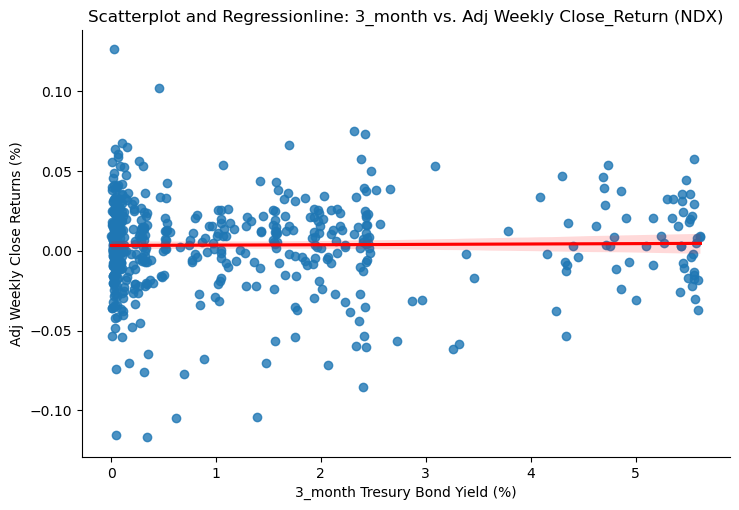

In [6]:
import pandas as pd
import xmltodict
import matplotlib.pyplot as plt


urbanAuditFile = 'data/data_notebook-1.2_^NDX.csv'
df_2 = pd.read_csv(urbanAuditFile, na_values=':')
df_2['Date'] = pd.to_datetime(df_2['Date'])
df_2['Adj Close_Return'] = df_2['Adj Close'].pct_change() * 100  # returns in percent
df_2 = df_2.dropna() #for any missing values present 

# Readinf the XML into a panads df
with open("./data/data_notebook-1.1_YieldCurveUSA.xml") as xml_file:
    data_dict = xmltodict.parse(xml_file.read())


entries = data_dict["feed"]["entry"]
rows = []
for entry in entries:
    row = {key: value["#text"] for key, value in entry["content"]["m:properties"].items()}
    rows.append(row)

# Crearing the df
df_1 = pd.DataFrame(rows)

# Change the columns names
new_column_names = ["Id", "Date", "1_month", "3_month", "6_month",
                    "1_year", "2_year", "3_year", "5_year", "7_year",
                    "10_year", "20_year", "30_year", "30_year_display",
                    "2_month", "4_month"]

df_1.columns = new_column_names

for i, val in enumerate(df_1["2_month"]):
    if not pd.isna(val):
        index = i
        break

for i, val in enumerate(df_1["4_month"]):
    if not pd.isna(val):
        index = i
        break

#Drop columns
df_1.drop(columns=["Id", "2_month","4_month", "30_year_display"], axis= 1, inplace=True)


# Convert "Date" column to datetime
df_1["Date"] = pd.to_datetime(df_1["Date"])

# Convert all other columns to integer
df_1[df_1.columns[1:]] = df_1[df_1.columns[1:]].astype(float)

#Code for step 3 starts here

import seaborn as sns
# Merge the two dataframes on the Date column
df_merged = pd.merge(df_1, df_2, on="Date", how="outer")
#drop the rows with missing values
df_merged = df_merged.dropna()

#Aggrgation function for returns
#Comulative product of daily returns (to find period returns)
def aggregation (x):
    result = ((x/100) + 1).prod() - 1
    return result

# Resample df to weekly frequency and calculate the mean of the 3_month and Adj Close_Return columns
df_weekly = df_merged.resample('W-Mon', on='Date').agg({
    #Aggregate '3_month' using the mean value in the week
    '3_month': 'mean',
    #Aggregate 'Adj Close_Return' using the costum function created
    'Adj Close_Return': aggregation })

# Plot the scatterplot and regression line of the 3_month rate vs. Adj Close_Return
plt.figure(figsize=(10, 6))
sns.lmplot(x='3_month', y='Adj Close_Return', data=df_weekly, aspect=1.5, line_kws={'color': 'red'})
plt.title('Scatterplot and Regressionline: 3_month vs. Adj Weekly Close_Return (NDX)')

plt.xlabel('3_month Tresury Bond Yield (%)')
plt.ylabel('Adj Weekly Close Returns (%)')
#show the plot
plt.show()


Document your decision and describe the resulting visualisation. In your answer, cover the following aspects by referring explicitly to Saket et al. (2019):

* What is the task according to Saket et al. (2019) on the combined data set supported by the chosen visualisation?
* Why is the chosen visualisation effective for the given task?
* What does the visualisation show exactly?
* What does the visualisation contribute to answering your project's questions?

#### Answer:
- The task supported by the chosen visualization, is identifying correlations. It involves examining the relationship between the 3-month interest rate and adjusted close returns of the analyzed stock index.

- As explained in the paper, the scatterplot is effective for this task because it allows viewers to visually discern trends and correlations between the two variables. By plotting each data point, the scatterplot provides a comprehensive view of how the variables relate across the dataset. The linear regression line added to the scatterplot helps in visually assessing the direction and strength of the relationship.

- The visualization specifically shows a scatterplot of data points with the 3-month interest rate on the x-axis and the adjusted close return on the y-axis. The choice of the 3-month interest rate is due to the fact that in finance such treasury bonds is often used as a proxy for the risk-free rate.
Each point represents a value for each week during the time period of 2013-01-07 to 2024-01-01. The red line represents a regression line, suggesting an attempt to model the linear relationship between the two variables.
We decided to divide the time period into weeks because in this way it will be possible to also analyze the standard deviation in the period. However, the limitation of the task to one single graph did not allow us to extend our analysis to the possible relation between volatility and interest rate.

- Regarding our question: Is there any correlation between the index performance and the interest rate? 
The plot contributes by providing a visual representation of the relationship between the 3-month interest rate and the adjusted close returns. This visualization can help us determine if there is a correlation between the two variables and the strength and direction of that correlation.
  We can see a pretty straight regression line, and both looking at the points and at the line we can say there seems to be no significant correlation between the two variables. (which is also supported by the high p-value of 0.7)


-----
## Step 4  (1 points)

Persist the merged dataset (Step 3) as a file and save the plot created in Step 3 as a [file](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html) (format: `svg`).

<Figure size 1000x600 with 0 Axes>

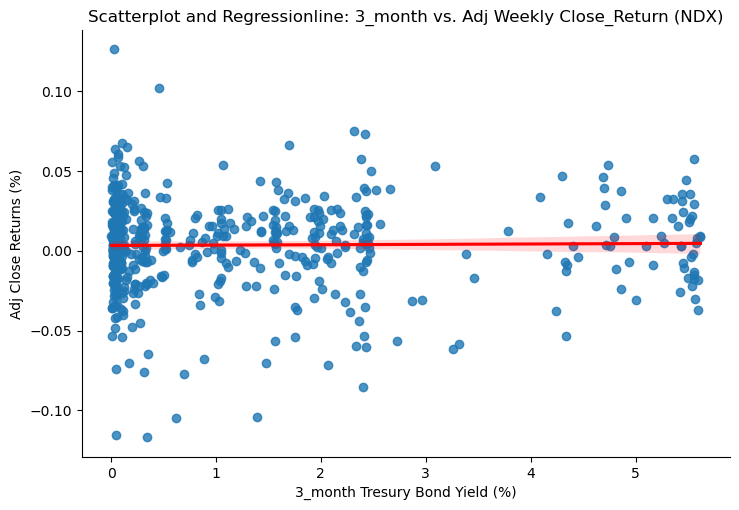

In [7]:
# 5: Save the merged dataset as a file
df_merged.to_csv('data/merged_data.csv', index=False)

#Previus plot 
plt.figure(figsize=(10, 6))
sns.lmplot(x='3_month', y='Adj Close_Return', data=df_weekly, aspect=1.5, line_kws={'color': 'red'})
plt.title('Scatterplot and Regressionline: 3_month vs. Adj Weekly Close_Return (NDX)')

plt.xlabel('3_month Tresury Bond Yield (%)')
plt.ylabel('Adj Close Returns (%)')

# 5: save the plot
plt.savefig(os.path.join("data", "scatterplot-3.svg"))
